<a href="https://colab.research.google.com/github/raj978/ECS-189G-DeepLearning/blob/main/stage4_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install torch torchvision torchaudio


In [5]:
!pip install numpy pandas matplotlib


In [6]:
!pip install scikit-learn


In [7]:
!pip install -U nltk

In [8]:
from google.colab import drive


In [9]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!unzip -o /content/drive/MyDrive/stage_4_data.zip -d /content/data/


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/stage_4_data/text_classification/train/pos/9260_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._9260_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/1599_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._1599_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2174_8.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2174_8.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2309_9.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2309_9.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/12034_10.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._12034_10.txt  
  inflating: /content/data/stage_4_data/text_classification/

In [28]:
!ls /content/data/


__MACOSX  stage_4_data


In [29]:
!ls /content/data/stage_4_data/


text_classification  text_generation


In [30]:
import os
from nltk.corpus import stopwords
import nltk
import string

data = []
label = 1
nltk.download('stopwords')
stop_words = stopwords.words('english')

for filename in os.listdir('/content/data/stage_4_data/text_classification/train/pos'):
    file_path = os.path.join('/content/data/stage_4_data/text_classification/train/pos', filename)
    if filename.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            #data cleaning- punctuation removal, normalisation, stop words removal,splitting of text
            translator = str.maketrans('', '', string.punctuation)
            text = text.translate(translator)
            text = text.lower()
            words = text.split()
            words = [w for w in words if not w in stop_words]
            data.append((words, label))
print(f"Total positive samples loaded: {len(data)}")
for text, label in data[:5]:
    print(f"Label: {label} → Text: {text[:20]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total positive samples loaded: 12500
Label: 1 → Text: ['visually', 'stunning', 'full', 'eastern', 'philosophy', 'amazing', 'martial', 'arts', 'fantasy', 'brought', 'master', 'director', 'tsui', 'hark', 'man', 'behind', 'best', 'films', 'hong', 'kong']
Label: 1 → Text: ['master', 'blackmailer', 'based', 'sir', 'arthur', 'conan', 'doyles', 'short', 'story', 'adventure', 'charles', 'augustus', 'milverton', 'first', 'feature', 'length', 'sherlock', 'holmes', 'story', 'jeremy']
Label: 1 → Text: ['sigh', 'sincerely', 'wonder', 'acclaimed', 'supposedly', 'profound', 'movie', 'critics', 'hold', 'grudge', 'director', 'michael', 'winner', 'surely', 'isnt', 'avatar', 'subtlety', 'films', 'practically', 'always']
Label: 1 → Text: ['understand', 'dislike', 'movie', 'cause', 'lack', 'knowledgebr', 'br', 'first', 'girls', 'geisha', 'brothel', 'tenants', 'one', 'dont', 'know', 'difference', 'understand', 'half', 'movie', 'certainly']
Label: 1 → Text: ['lot', 'people', 'get', 'hung', 'films', 'tag', 'c

In [31]:

neg_data = []
label = 0
nltk.download('stopwords')
stop_words = stopwords.words('english')

for file_name in os.listdir('/content/data/stage_4_data/text_classification/train/neg'):
    file_path = os.path.join('/content/data/stage_4_data/text_classification/train/neg', file_name)
    if file_name.endswith('.txt'):
        with open(file_path, 'r', encoding='utf-8') as file:
            neg_text = file.read()
            #data cleaning- punctuation removal, normalisation, stop words removal,splitting of text
            translator = str.maketrans('', '', string.punctuation)
            neg_text = neg_text.translate(translator)
            neg_text = neg_text.lower()
            neg_words = neg_text.split()
            neg_words = [w for w in neg_words if not w in stop_words]
            neg_data.append((neg_words, label))
print(f"Total negative samples loaded: {len(neg_data )}")
for text, label in neg_data[:5]:
    print(f"Label: {label} → Text: {text[:20]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total negative samples loaded: 12500
Label: 0 → Text: ['btk', 'killer', 'green', 'river', 'killer', 'zodiac', 'killer', 'man', 'keeps', 'putting', 'absolute', 'garbage', 'ironic', 'thing', 'loves', 'crapbr', 'br', 'ive', 'never', 'seen']
Label: 0 → Text: ['time', 'ever', 'walked', 'movie', 'years', 'later', 'saw', 'cable', 'listings', 'thought', 'maybe', 'give', 'another', 'try', 'suffice', 'say', 'right', 'first', 'time', 'ranks']
Label: 0 → Text: ['apparently', 'shakespeare', 'equals', 'high', 'brow', 'equals', 'turn', 'bunch', 'folks', 'seeing', 'something', 'really', 'one', 'point', 'film', 'someone', 'believe', 'pacinos', 'producer', 'warns']
Label: 0 → Text: ['offensively', 'overthetop', 'action', 'adventurefirst', 'blood', 'part', 'ii', 'seemed', 'catch', 'mood', 'us', 'time', 'release', 'mid80swith', 'rightwing', 'reaganism', 'virulent', 'antired', 'feelings', 'still']
Label: 0 → Text: ['1930', 'golden', 'age', 'los', 'angeles', 'film', 'industry', 'great', 'potential', 'variou

In [32]:
#checking to see if the data is
num_pos = sum(1 for text, label in data if label == 1)
num_neg = sum(1 for text, label in neg_data if label == 0)

print(f"Number of positive samples: {num_pos}")
print(f"Number of negative samples: {num_neg}")


Number of positive samples: 12500
Number of negative samples: 12500


In [33]:
#combining the positive and negative data
alldata=data+neg_data
print(len(alldata))

25000


In [34]:
from collections import Counter

# Flatten all tokens into one big list
all_tokens = [word for tokens, _ in alldata for word in tokens]

count_word_frequency = Counter(all_tokens)

# Build vocabulary: word -> unique index
vocab = {word: idx+2 for idx, (word, _) in enumerate(count_word_frequency.items())}
vocab['<PAD>'] = 0  # Padding token index
vocab['<UNK>'] = 1  # Unknown word index (OOV handling)

print(f"Vocabulary size: {len(vocab)}")

Vocabulary size: 121225


In [35]:

review_lengths = [len(tokens) for tokens, _ in alldata]

print(f"Max review length: {max(review_lengths)}")
print(f"Min review length: {min(review_lengths)}")
print(f"Average review length: {sum(review_lengths)/len(review_lengths):.2f}")

Max review length: 1449
Min review length: 4
Average review length: 124.25


In [36]:
import numpy as np

print(f"90th percentile length: {np.percentile(review_lengths, 90):.0f}")
print(f"95th percentile length: {np.percentile(review_lengths, 95):.0f}")
print(f"99th percentile length: {np.percentile(review_lengths, 99):.0f}")


90th percentile length: 247
95th percentile length: 321
99th percentile length: 481


In [37]:
max_len = 321

def encode_and_pad(tokens, vocab, max_len=max_len):
    indices = [vocab.get(token, vocab['<UNK>']) for token in tokens]
    if len(indices) >= max_len:
        indices = indices[:max_len]
    else:
        indices += [vocab['<PAD>']] * (max_len - len(indices))
    return indices
encoded_data = [(encode_and_pad(tokens, vocab, max_len), label) for tokens, label in alldata]

#print(f"First encoded & padded sample: {encoded_data[0][0][:20]}")  # First 20 indices
#print(f"Label: {encoded_data[0][1]}")

In [38]:
import torch

# Convert to tensors
input_tensors = torch.tensor([sample for sample, _ in encoded_data], dtype=torch.long)
labels_tensor = torch.tensor([label for _, label in encoded_data], dtype=torch.long)

print(f"Input tensors shape: {input_tensors.shape}")  # Expected: (num_samples, max_len)
print(f"Labels shape: {labels_tensor.shape}")


Input tensors shape: torch.Size([25000, 321])
Labels shape: torch.Size([25000])


In [39]:
from torch.utils.data import DataLoader, TensorDataset


In [40]:
from sklearn.model_selection import train_test_split

# Split data for validation (optional but helps)
X_train, X_val, y_train, y_val = train_test_split(input_tensors, labels_tensor, test_size=0.1, random_state=42)

# Create loaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [41]:
print(f"Total train batches: {len(train_loader)}")
print(f"Total validation batches: {len(val_loader)}")


Total train batches: 176
Total validation batches: 40


In [72]:

# ✅ NOW define the model
import torch.nn as nn

class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim,dropout=0.3):
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True,bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.norm = nn.LayerNorm(hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        forward_hidden = hidden[-2,:,:]  # Last layer forward hidden state
        backward_hidden = hidden[-1,:,:]  # Last layer backward hidden state
        hidden_cat = torch.cat((forward_hidden, backward_hidden), dim=1)  # (batch_size, hidden_dim * 2)
        out = self.norm(hidden_cat)  # <--- Apply LayerNorm here
        out = self.dropout(out)
        return self.fc(out)

In [79]:
vocab_size = len(vocab)
embed_dim = 200
hidden_dim = 256
output_dim = 2
dropout = 0.3
model = TextLSTM(vocab_size, embed_dim, hidden_dim, output_dim, dropout).to('cuda')

# Loss & Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)
criterion = nn.CrossEntropyLoss()





Epoch 1/15 | Loss: 0.6304 | Train Acc: 64.54% | Val Acc: 69.76%
Epoch 2/15 | Loss: 0.4814 | Train Acc: 78.50% | Val Acc: 76.56%
Epoch 3/15 | Loss: 0.4564 | Train Acc: 79.50% | Val Acc: 77.84%
Epoch 4/15 | Loss: 0.3340 | Train Acc: 86.17% | Val Acc: 79.48%
Epoch 5/15 | Loss: 0.2432 | Train Acc: 90.68% | Val Acc: 81.04%
Epoch 6/15 | Loss: 0.1730 | Train Acc: 93.64% | Val Acc: 83.32%
Epoch 7/15 | Loss: 0.1191 | Train Acc: 95.77% | Val Acc: 80.96%
Epoch 8/15 | Loss: 0.0694 | Train Acc: 97.68% | Val Acc: 82.96%
Epoch 9/15 | Loss: 0.0740 | Train Acc: 97.40% | Val Acc: 81.76%
Epoch 10/15 | Loss: 0.0525 | Train Acc: 98.18% | Val Acc: 83.72%
Epoch 11/15 | Loss: 0.0407 | Train Acc: 98.57% | Val Acc: 82.80%
Epoch 12/15 | Loss: 0.0309 | Train Acc: 98.98% | Val Acc: 83.76%
Epoch 13/15 | Loss: 0.0214 | Train Acc: 99.31% | Val Acc: 81.28%
Epoch 14/15 | Loss: 0.0570 | Train Acc: 98.17% | Val Acc: 84.32%
Epoch 15/15 | Loss: 0.0387 | Train Acc: 98.76% | Val Acc: 82.60%


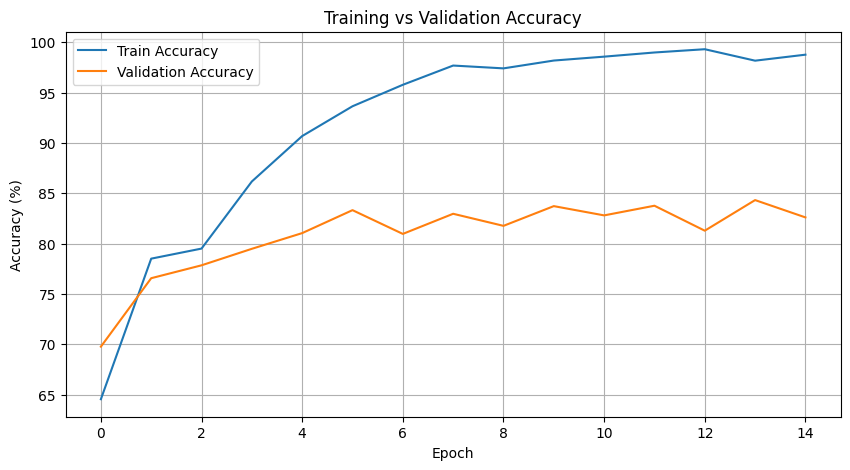

In [80]:
import matplotlib.pyplot as plt

train_accuracies = []
val_accuracies = []
losses = []

num_epochs = 15
train_accuracies, val_accuracies, losses = [], [], []


for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to('cuda'), y_batch.to('cuda')

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_acc = 100 * correct / total

    # Validation Accuracy
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to('cuda'), y_batch.to('cuda')
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == y_batch).sum().item()
            val_total += y_batch.size(0)

    val_acc = 100 * val_correct / val_total
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    losses.append(total_loss / len(train_loader))
    scheduler.step(val_acc)



    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {total_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
